In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# SVM

1. RESNet

2024-08-11 17:01:02.327412: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 17:01:02.327599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 17:01:02.494120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


تم إنشاء المجلد بنجاح: /kaggle/working/svm_resNet
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.94      0.96      0.95        85

    accuracy                           0.93       111
   macro avg       0.91      0.89      0.90       111
weighted avg       0.93      0.93      0.93       111

Best trained model saved at: /kaggle/working/svm_resNet/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet/test_predictions_best.csv


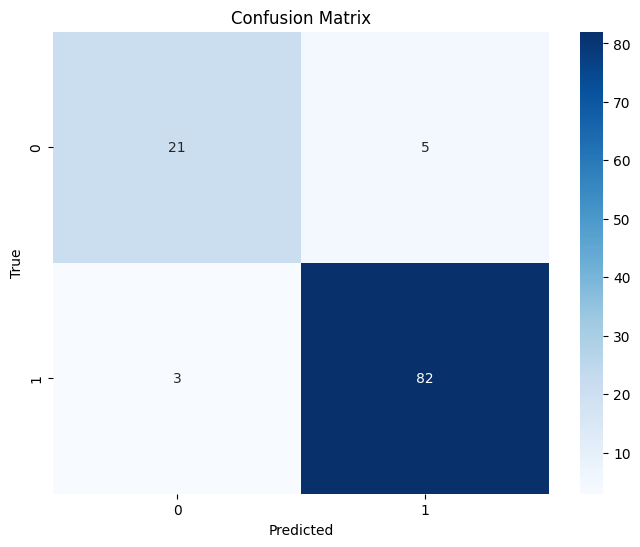

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/svm_resNet'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    df = pd.read_csv(os.path.join(data_dir, 'feature_Res_net.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image','target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


2. Gabor

المجلد موجود بالفعل: /kaggle/working/gabor_svm
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.800 total time=   0.7s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.814 total time=   0.6s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.789 total time=   0.7s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.779 total time=   0.6s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.849 total time=   0.8s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.675 total time=   0.9s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   1.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   0.9s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   0.9s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   0.9s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.800 total time=   0.7s
[

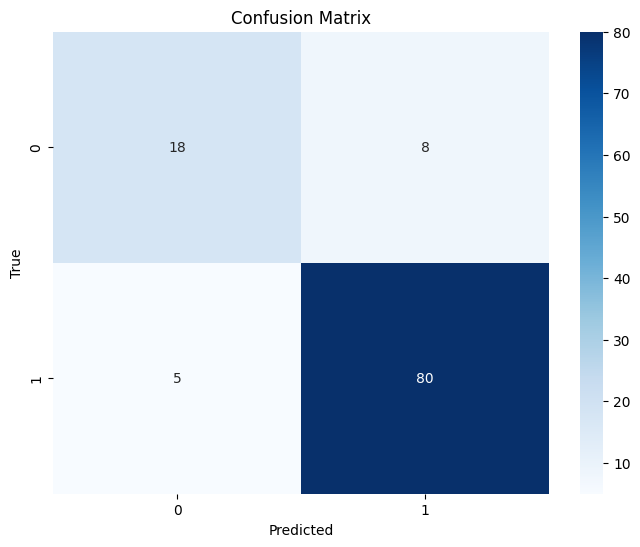

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        26
           1       0.91      0.94      0.92        85

    accuracy                           0.88       111
   macro avg       0.85      0.82      0.83       111
weighted avg       0.88      0.88      0.88       111

Classification report saved at: /kaggle/working/gabor_svm/classification_report_gabor_svm.txt


In [1]:
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/gabor_svm'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join(data_dir, 'features_gabor.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['index','image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    imputer = SimpleImputer(strategy='mean')
    X_train_scaled = scaler.fit_transform(X_train)    
    X_train_scaled_imputed = imputer.fit_transform(X_train_scaled) 
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled_imputed = imputer.transform(X_test_scaled)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
    grid.fit(X_train_scaled_imputed, y_train)

    # Print best hyperparameters
    print("Best hyperparameters:", grid.best_params_)

    # Predict using best model
    y_pred = grid.predict(X_test_scaled_imputed)

    # Print and save model accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score with tuned hyperparameters: {0:0.4f}'.format(accuracy))
    with open(os.path.join(output_dir, 'accuracy_score_svm_gabor.txt'), 'w') as f:
        f.write('Model accuracy score with tuned hyperparameters: {0:0.4f}'.format(accuracy))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_tuned_gabor_svm.joblib')
    dump(grid.best_estimator_, model_output_path)
    print('Trained model saved at:', model_output_path)

    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_gabor_svm.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_gabor_svm.csv'))

    # Create and save confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_gabor_svm.png'))
    plt.show()

    # Create and save classification report
    report = classification_report(y_test, y_pred)
    print(report)
    with open(os.path.join(output_dir, 'classification_report_gabor_svm.txt'), 'w') as f:
        f.write(report)
    print('Classification report saved at:', os.path.join(output_dir, 'classification_report_gabor_svm.txt'))

if __name__ == '__main__':
    main()


In [17]:
import os

# تحديد مسار المجلد الجديد
new_folder_path = '/kaggle/working/DWT_ANN_PCA'

# إنشاء المجلد
os.makedirs(new_folder_path)

# تأكيد إنشاء المجلد
print("تم إنشاء المجلد بنجاح في:", new_folder_path)


تم إنشاء المجلد بنجاح في: /kaggle/working/DWT_ANN_PCA


3. DWT 

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        26
           1       0.99      0.95      0.97        85

    accuracy                           0.95       111
   macro avg       0.92      0.96      0.94       111
weighted avg       0.96      0.95      0.96       111

Best trained model saved at: /kaggle/working/DWT_svm/svm_model_best_DWT_SVM.joblib
Test predictions saved at: /kaggle/working/DWT_svm/test_predictions_best_DWT_SVM.csv


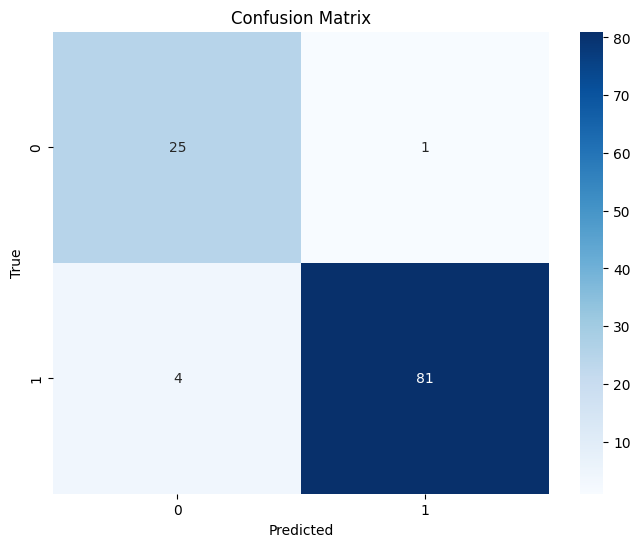

Confusion Matrix plot saved at: /kaggle/working/DWT_svm/confusion_matrix_DWT_SVM.png
Classification Report saved at: /kaggle/working/DWT_svm/classification_report_DWT_SVM.txt


In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer
def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/DWT_svm'
    os.makedirs(output_dir)

    df = pd.read_csv(os.path.join(data_dir, 'feautur_DWT_s_u.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image','target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    best_params = clf.best_params_
    print("Best parameters:", best_params)
    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best_DWT_SVM.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)

    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best_DWT_SVM.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best_DWT_SVM.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_SVM.png'))
    plt.show()
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_SVM.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_SVM.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_SVM.txt'))

if __name__ == '__main__':
    main()
    

# ANN

1. RESNet

المجلد موجود بالفعل: /kaggle/working/S_U/RESNet_ANN


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7529 - loss: 1.8730
Epoch 1: val_accuracy improved from -inf to 0.85586, saving model to /kaggle/working/S_U/RESNet_ANN/best_model_RESNET_DL.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.7531 - loss: 1.8782 - val_accuracy: 0.8559 - val_loss: 1.3316
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8533 - loss: 1.4795
Epoch 2: val_accuracy improved from 0.85586 to 0.87387, saving model to /kaggle/working/S_U/RESNet_ANN/best_model_RESNET_DL.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8526 - loss: 1.4894 - val_accuracy: 0.8739 - val_loss: 3.0597
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8819 - loss: 1.4037
Epoch 3: val_accuracy did not improve from 0.87387
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8819 - loss: 1.3937 - val_accuracy: 0.8649 - val_loss: 2.5788
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8949 - loss: 0.8826


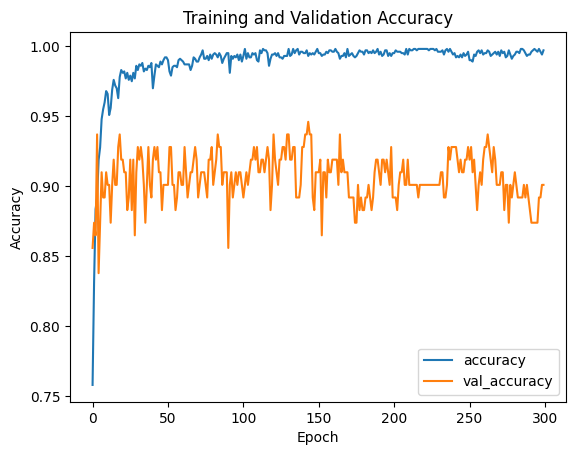

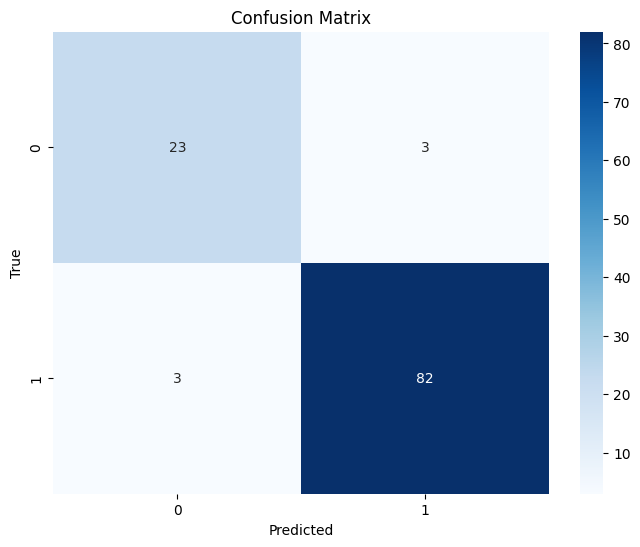

Classification Report saved at: /kaggle/working/S_U/RESNet_ANN/classification_report_RESNET_DL.txt


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/S_U/RESNet_ANN'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    df = pd.read_csv(os.path.join(data_dir, 'feature_Res_net.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image','target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_RESNET_DL.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_scaled, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_scaled, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_scaled) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Plot training curve
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(os.path.join(output_dir, 'training_curve_RESNET_DL.png'))
    plt.show()

    # Save the confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_RESNET_DL.png'))
    plt.show()

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_RESNET_DL.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_RESNET_DL.txt'))

if __name__ == '__main__':
    main()


2. Gabor 

المجلد موجود بالفعل: /kaggle/working/S_U/gabor_ANN
Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6596 - loss: 0.9869
Epoch 1: val_accuracy improved from -inf to 0.84685, saving model to /kaggle/working/S_U/gabor_ANN/best_model_Gabor_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6785 - loss: 0.9409 - val_accuracy: 0.8468 - val_loss: 0.4077
Epoch 2/300
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8010 - loss: 0.5490
Epoch 2: val_accuracy improved from 0.84685 to 0.88288, saving model to /kaggle/working/S_U/gabor_ANN/best_model_Gabor_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7986 - loss: 0.5520 - val_accuracy: 0.8829 - val_loss: 0.3734
Epoch 3/300
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7693 - loss: 0.5669
Epoch 3: val_accuracy did not improve from 0.88288
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7759 - loss: 0.5511 - val_accuracy: 0.8468 - val_loss: 0.3401
Epoch 4/300
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8103 - loss: 0.4864
Epoch 4: val_accurac

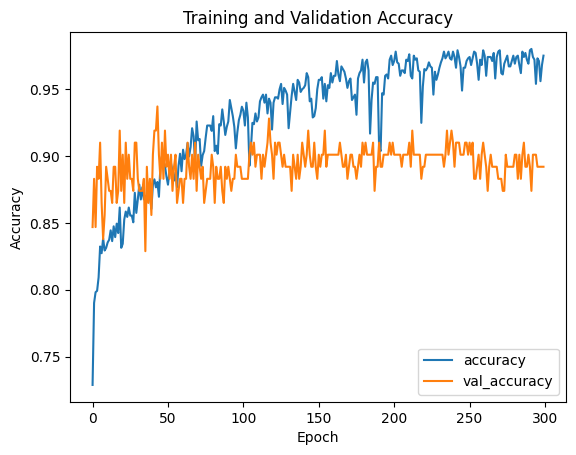

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model accuracy score on test data: 0.9369
Trained model saved at: /kaggle/working/S_U/gabor_ANN/ann_model_gabor.h5
Confusion Matrix plot saved at: /kaggle/working/S_U/gabor_ANN/confusion_matrix__gabor_ANN.png
Classification Report saved at: /kaggle/working/S_U/gabor_ANN/classification_report__gabor_ANN.txt


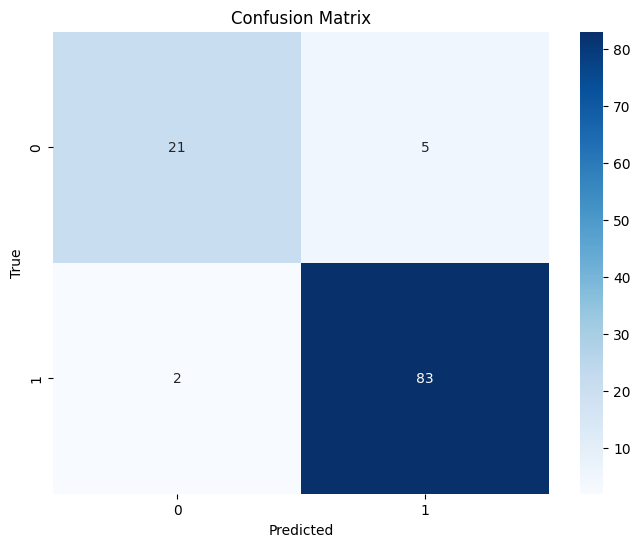

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()
def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/S_U/gabor_ANN'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join(data_dir, 'features_gabor.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['index','image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    imputer = SimpleImputer(strategy='mean')
    X_train_scaled = scaler.fit_transform(X_train)    
    X_train_scaled_imputed = imputer.fit_transform(X_train_scaled) 
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled_imputed = imputer.transform(X_test_scaled)
    # Build the ANN model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled_imputed.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_Gabor_ANN.keras')  # Update filepath
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )
    # Train the model with the callback
    history = model.fit(
        X_train_scaled_imputed, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_scaled_imputed, y_test),
        callbacks=[model_checkpoint_callback]  # Include the callback here
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_Gabor_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_scaled_imputed) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))
    # Save the trained model
    model_output_path = os.path.join(output_dir, 'ann_model_gabor.h5')
    model.save(model_output_path)
    print('Trained model saved at:', model_output_path)

    # Generate and save confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix__gabor_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix__gabor_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report__gabor_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report__gabor_ANN.txt'))

    # Plot and save precision-recall curve (if applicable)
    # Add code for plotting and saving precision-recall curve here

if __name__ == '__main__':
    main()


3. DWT  

المجلد موجود بالفعل: /kaggle/working/S_U/DWT_ANN


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5759 - loss: 1.4588
Epoch 1: val_accuracy improved from -inf to 0.86486, saving model to /kaggle/working/S_U/DWT_ANN/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5813 - loss: 1.4611 - val_accuracy: 0.8649 - val_loss: 1.5880
Epoch 2/300
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8226 - loss: 0.4852
Epoch 2: val_accuracy improved from 0.86486 to 0.90991, saving model to /kaggle/working/S_U/DWT_ANN/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8225 - loss: 0.4876 - val_accuracy: 0.9099 - val_loss: 0.3582
Epoch 3/300
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8832 - loss: 0.3524
Epoch 3: val_accuracy improved from 0.90991 to 0.91892, saving model to /kaggle/working/S_U/DWT_ANN/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8835 - loss: 0.3508 - val_accuracy: 0.9189 - val_loss: 0.2479
Epoch 4/300
31/32 ━━━━

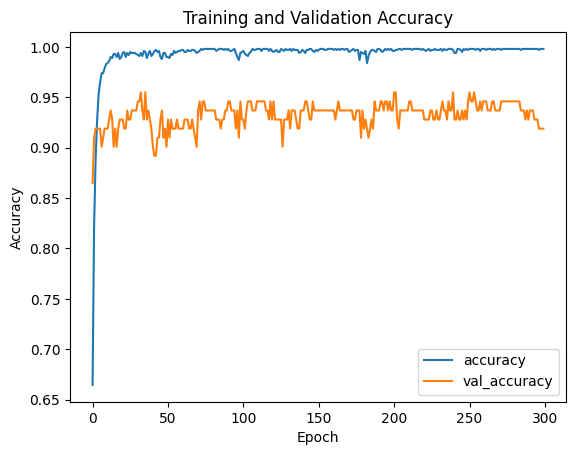

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model accuracy score on test data: 0.9550
Best model saved at: /kaggle/working/S_U/DWT_ANN/best_model_DWT_ANN.keras
Confusion Matrix plot saved at: /kaggle/working/S_U/DWT_ANN/confusion_matrix_DWT_ANN.png
Classification Report saved at: /kaggle/working/S_U/DWT_ANN/classification_report_DWT_ANN.txt


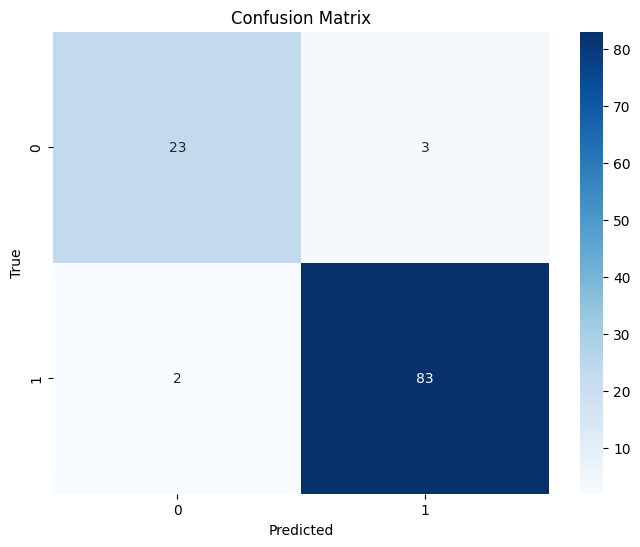

In [12]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/S_U/DWT_ANN'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    # Read data
    df = pd.read_csv(os.path.join(data_dir, 'feautur_DWT_s_u.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_DWT_ANN.keras')  # Update filepath
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )
    # Train the model with the callback
    history = model.fit(
        X_train_scaled, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_scaled, y_test),
        callbacks=[model_checkpoint_callback]  # Include the callback here
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_DWT_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_scaled) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_ANN.txt'))

if __name__ == '__main__':
    main()


In [6]:
import shutil

# المجلد الذي ترغب في ضغطه
folder_to_zip = '/kaggle/working/gabor_svm'

# اسم الملف المضغوط الناتج
zip_file_name = '/kaggle/working/gabor_svm_1'

# ضغط المجلد
shutil.make_archive(zip_file_name, 'zip', folder_to_zip)

# تأكيد إنشاء الملف المضغوط
print("تم ضغط المجلد بنجاح إلى:", zip_file_name)


تم ضغط المجلد بنجاح إلى: /kaggle/working/gabor_svm_1


# SVM with PCA

* RESNet

المجلد موجود بالفعل: /kaggle/working/S_U/RESNet_SVM_PCA
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.96      0.96      0.96        85

    accuracy                           0.95       111
   macro avg       0.92      0.92      0.92       111
weighted avg       0.95      0.95      0.95       111

Best trained model saved at: /kaggle/working/S_U/RESNet_SVM_PCA/svm_model_best_PCA.joblib
Classification Report saved at: /kaggle/working/S_U/RESNet_SVM_PCA/classification_report_resnet_SVM_PCA.txt
Test predictions saved at: /kaggle/working/S_U/RESNet_SVM_PCA/test_predictions_best_resnet_svm_PCA.csv


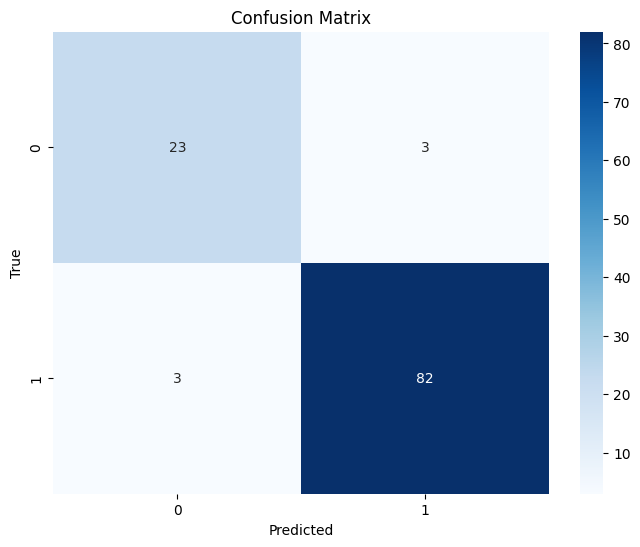

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA  # Add PCA import

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/S_U/RESNet_SVM_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    df = pd.read_csv(os.path.join(data_dir, 'feature_Res_net.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image','target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)
 
    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train_pca, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test_pca)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best_PCA.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_resnet_SVM_PCA.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_resnet_SVM_PCA.txt'))
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best_resnet_svm_PCA.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best_resnet_svm_PCA.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


* Gabor

المجلد موجود بالفعل: /kaggle/working/S_U/Gabor_SVM_PCA
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.795 total time=   0.4s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.839 total time=   0.8s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.824 total time=   0.4s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.819 total time=   0.3s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.834 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.675 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.678 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.685 total time=

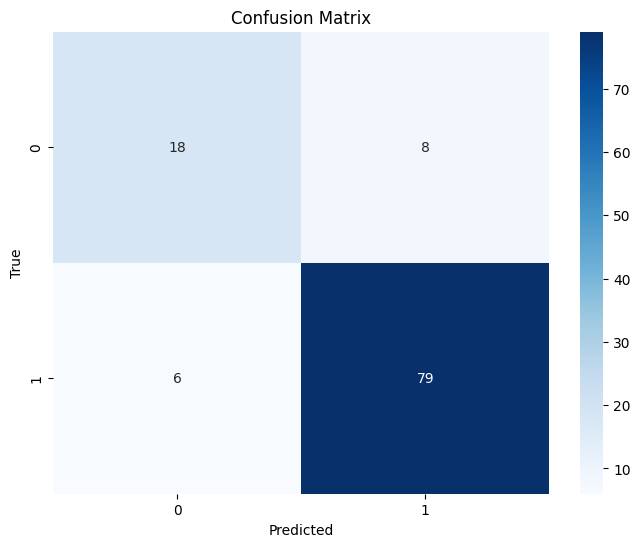

In [13]:
# Importing necessary libraries
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/S_U/Gabor_SVM_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join(data_dir, 'features_gabor.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['index','image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)
    
    # Data preprocessing
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],  # Add more kernel options
        'gamma': ['scale', 'auto']
    }

    grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, scoring='accuracy', cv=5)
    grid.fit(X_train_pca, y_train)

    # Print best hyperparameters
    print("Best hyperparameters:", grid.best_params_)

    # Predict using best model
    y_pred = grid.predict(X_test_pca)

    # Print and save model accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score with tuned hyperparameters: {0:0.4f}'.format(accuracy))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_tuned_gabor_svm_PCA.joblib')
    dump(grid.best_estimator_, model_output_path)
    print('Trained model saved at:', model_output_path)

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_gabor_SVM_PCA.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_gabor_SVM_PCA.txt'))

    # Create and save confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_gabor_svm.png'))
    plt.show()

if __name__ == '__main__':
    main()


* DWT

2024-08-12 10:35:30.593012: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 10:35:30.593173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 10:35:30.751871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


تم إنشاء المجلد بنجاح: /kaggle/working/S_U/DWT_SVM_PCA
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.99      0.96      0.98        85

    accuracy                           0.96       111
   macro avg       0.94      0.96      0.95       111
weighted avg       0.97      0.96      0.96       111

Best trained model saved at: /kaggle/working/S_U/DWT_SVM_PCA/svm_model_best_DWT_SVM.joblib
Test predictions saved at: /kaggle/working/S_U/DWT_SVM_PCA/test_predictions_best_DWT_SVM.csv


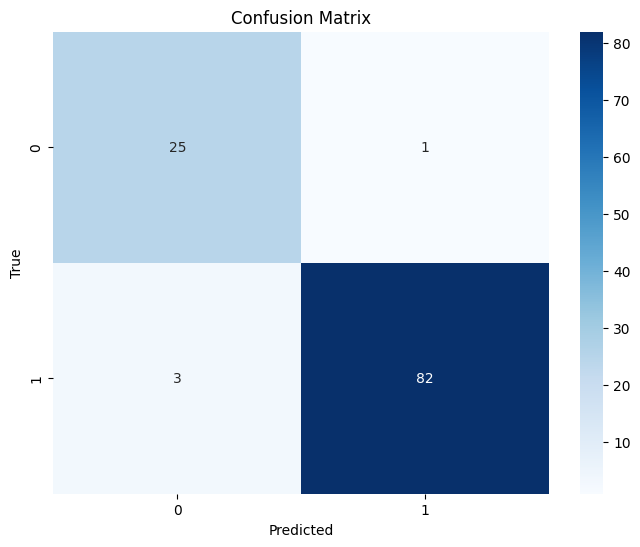

Confusion Matrix plot saved at: /kaggle/working/S_U/DWT_SVM_PCA/confusion_matrix_DWT_SVM.png
Classification Report saved at: /kaggle/working/S_U/DWT_SVM_PCA/classification_report_DWT_SVM.txt


In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

def main():
    # Read data
    data_dir = '/kaggle/input/data-s-u-f/feature_s_u'
    output_dir = '/kaggle/working/S_U/DWT_SVM_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    df = pd.read_csv(os.path.join(data_dir, 'feautur_DWT_s_u.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image','target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train_pca, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    best_params = clf.best_params_
    print("Best parameters:", best_params)
    # Predict using the best estimator
    y_pred = best_svc.predict(X_test_pca)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best_DWT_SVM.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)

    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best_DWT_SVM.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best_DWT_SVM.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_SVM.png'))   
    plt.show()

    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_SVM.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_SVM.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_SVM.txt'))

if __name__ == '__main__':
    main()

In [5]:
import shutil

# المجلد الذي ترغب في ضغطه
folder_to_zip = '/kaggle/working/DWT_ANN_PCA'

# اسم الملف المضغوط الناتج
zip_file_name = '/kaggle/working/DWT_svm'

# ضغط المجلد
shutil.make_archive(zip_file_name, 'zip', folder_to_zip)

# تأكيد إنشاء الملف المضغوط
print("تم ضغط المجلد بنجاح إلى:", zip_file_name)


تم ضغط المجلد بنجاح إلى: /kaggle/working/DWT_svm


# ANN with PCA

* RESNet

تم إنشاء المجلد بنجاح: /kaggle/working/S_U/RESNet_ANN_PCA


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6508 - loss: 4.3414
Epoch 1: val_accuracy improved from -inf to 0.88288, saving model to /kaggle/working/S_U/RESNet_ANN_PCA/best_model_RESNET_DL.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6537 - loss: 4.2952 - val_accuracy: 0.8829 - val_loss: 0.7177
Epoch 2/300
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7710 - loss: 2.1325 
Epoch 2: val_accuracy did not improve from 0.88288
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7739 - loss: 2.0667 - val_accuracy: 0.8468 - val_loss: 0.6513
Epoch 3/300
17/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8135 - loss: 1.3616 
Epoch 3: val_accuracy did not improve from 0.88288
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8100 - loss: 1.3193 - val_accuracy: 0.8649 - val_loss: 0.5641
Epoch 4/300
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 1.1750 
Epoch 4: val_accuracy did not improve from 0.88288
32/32 ━━━━━━━━━━━━━━━━━━━━ 

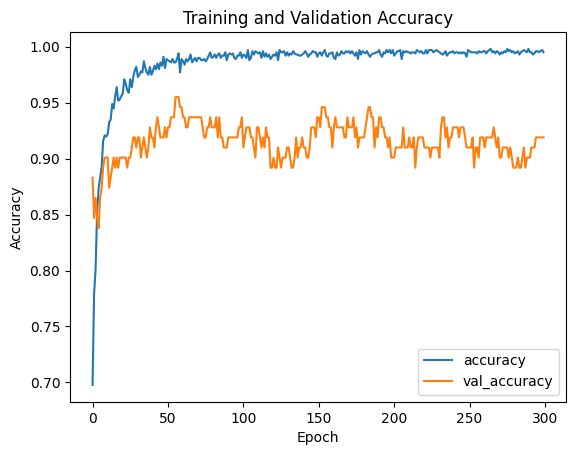

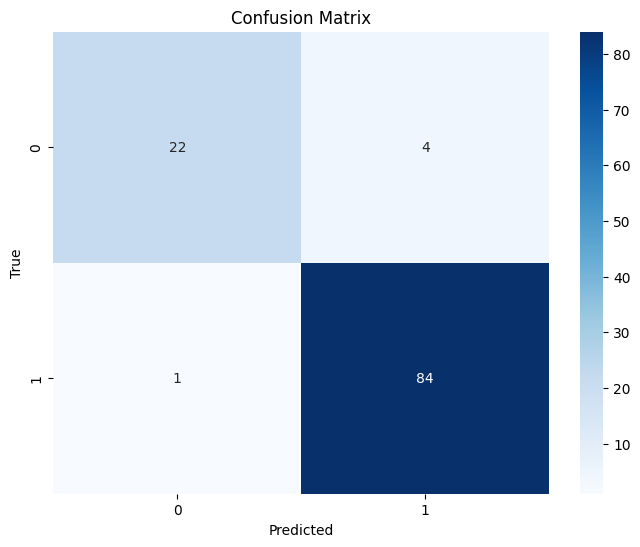

Classification Report saved at: /kaggle/working/S_U/RESNet_ANN_PCA/classification_report_RESNET_DL.txt


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/S_U/RESNet_ANN_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    df = pd.read_csv(os.path.join(data_dir, 'feature_Res_net.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image','target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_RESNET_DL.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Plot training curve
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(os.path.join(output_dir, 'training_curve_RESNET_DL.png'))
    plt.show()

    # Save the confusion matrix plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_RESNET_DL.png'))
    plt.show()

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_RESNET_DL.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_RESNET_DL.txt'))

if __name__ == '__main__':
    main()


* Gabor

المجلد موجود بالفعل: /kaggle/working/S_U/gabor_ANN_PCA


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4847 - loss: 1.8129
Epoch 1: val_accuracy improved from -inf to 0.86486, saving model to /kaggle/working/S_U/gabor_ANN_PCA/best_model_gabor_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5247 - loss: 1.6246 - val_accuracy: 0.8649 - val_loss: 0.5446
Epoch 2/300
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6450 - loss: 1.0025 
Epoch 2: val_accuracy did not improve from 0.86486
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6532 - loss: 0.9545 - val_accuracy: 0.8559 - val_loss: 0.4448
Epoch 3/300
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7011 - loss: 0.9085 
Epoch 3: val_accuracy improved from 0.86486 to 0.87387, saving model to /kaggle/working/S_U/gabor_ANN_PCA/best_model_gabor_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7095 - loss: 0.8620 - val_accuracy: 0.8739 - val_loss: 0.4064
Epoch 4/300
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7430 - loss: 0.732

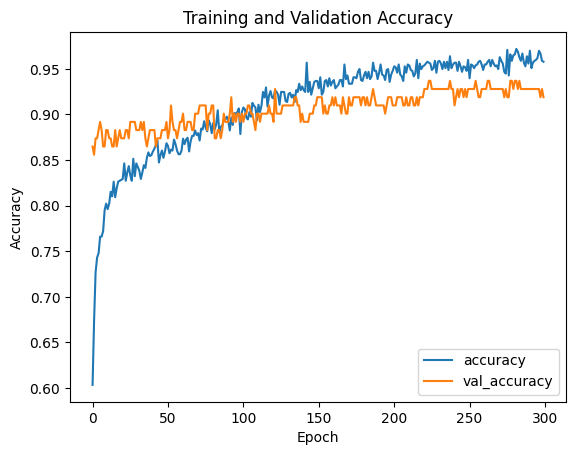

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model accuracy score on test data: 0.9369
Best model saved at: /kaggle/working/S_U/gabor_ANN_PCA/best_model_gabor_ANN.keras
Trained model saved at: /kaggle/working/S_U/gabor_ANN_PCA/ann_model_gabor_pca.h5
Confusion Matrix plot saved at: /kaggle/working/S_U/gabor_ANN_PCA/confusion_matrix__gabor_ANN_pca.png
Classification Report saved at: /kaggle/working/S_U/gabor_ANN_PCA/classification_report__gabor_ANN_pca.txt


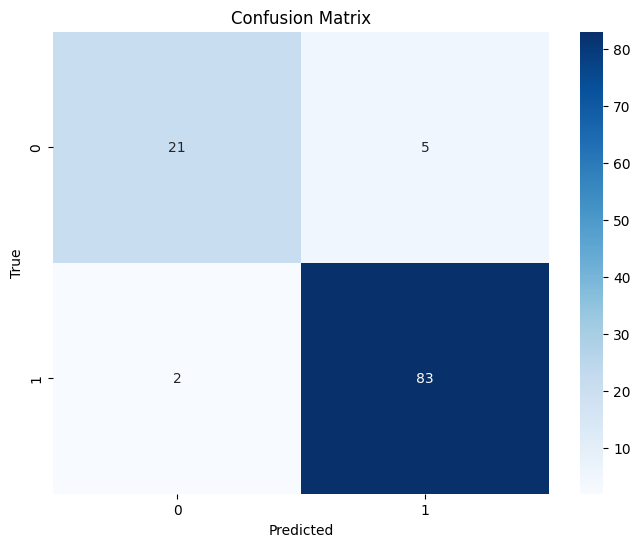

In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA  # Import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()
def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/S_U/gabor_ANN_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join(data_dir, 'features_gabor.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['index','image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    imputer = SimpleImputer(strategy='mean')
    X_train_scaled = scaler.fit_transform(X_train)    
    X_train_scaled_imputed = imputer.fit_transform(X_train_scaled) 
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled_imputed = imputer.transform(X_test_scaled)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled_imputed)
    X_test_pca = pca.transform(X_test_scaled_imputed)

    # Build the ANN model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_gabor_ANN.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_gabor_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)


    # Save the trained model
    model_output_path = os.path.join(output_dir, 'ann_model_gabor_pca.h5')
    model.save(model_output_path)
    print('Trained model saved at:', model_output_path)

    # Generate and save confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix__gabor_ANN_pca.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix__gabor_ANN_pca.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report__gabor_ANN_pca.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report__gabor_ANN_pca.txt'))

if __name__ == '__main__':
    main()


تم إنشاء المجلد بنجاح: /kaggle/working/DWT_ANN_PCA
Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 118.3168
Epoch 1: val_accuracy improved from -inf to 0.81081, saving model to /kaggle/working/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6693 - loss: 104.5853 - val_accuracy: 0.8108 - val_loss: 17.6264
Epoch 2/300
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 37.6959 
Epoch 2: val_accuracy improved from 0.81081 to 0.90991, saving model to /kaggle/working/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7120 - loss: 36.5771 - val_accuracy: 0.9099 - val_loss: 11.8683
Epoch 3/300
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 32.7779 
Epoch 3: val_accuracy improved from 0.90991 to 0.92793, saving model to /kaggle/working/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7289 - loss: 31.5987 - val_accuracy: 0.9279 - val_loss: 5.5611
Epoch 4/300
22/32 ━━━━━━━━━

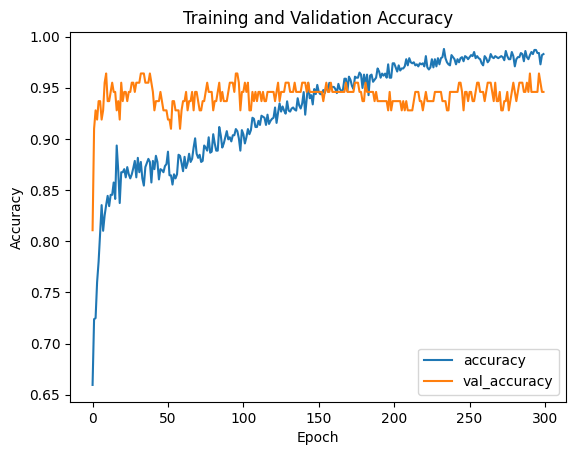

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model accuracy score on test data: 0.9640
Best model saved at: /kaggle/working/DWT_ANN_PCA/best_model_DWT_ANN.keras
Confusion Matrix plot saved at: /kaggle/working/DWT_ANN_PCA/confusion_matrix_DWT_ANN.png
Classification Report saved at: /kaggle/working/DWT_ANN_PCA/classification_report_DWT_ANN.txt


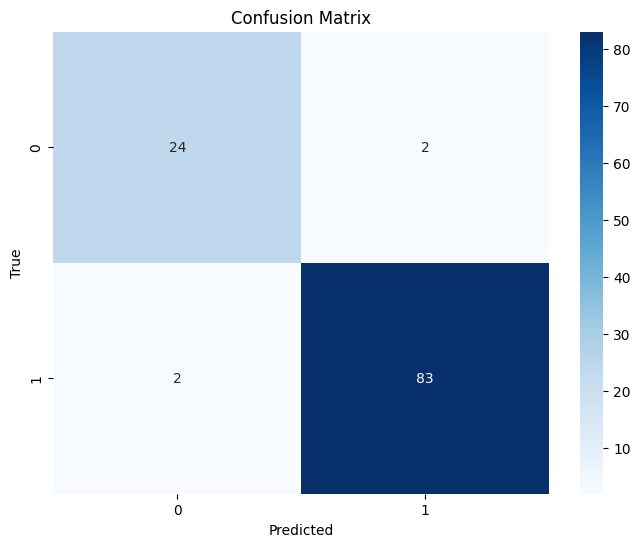

In [5]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA  # Add PCA import
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/dwt-feauture/DWT'
    output_dir = '/kaggle/working/DWT_ANN_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join('/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_DWT_ANN.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_DWT_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_ANN.txt'))

if __name__ == '__main__':
    main()


تم إنشاء المجلد بنجاح: /kaggle/working/S_U/DWT_ANN_PCA
Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4727 - loss: 180.2370
Epoch 1: val_accuracy improved from -inf to 0.88288, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5201 - loss: 160.0635 - val_accuracy: 0.8829 - val_loss: 23.5051
Epoch 2/300
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - loss: 63.9116 
Epoch 2: val_accuracy did not improve from 0.88288
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6978 - loss: 64.6373 - val_accuracy: 0.8739 - val_loss: 12.5368
Epoch 3/300
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7130 - loss: 44.4091 
Epoch 3: val_accuracy improved from 0.88288 to 0.90090, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7217 - loss: 43.8738 - val_accuracy: 0.9009 - val_loss: 9.6047
Epoch 4/300
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7801 - loss: 35.2264 
Epoch 

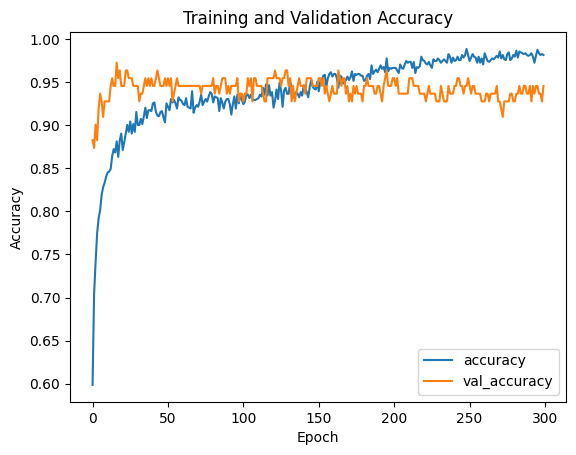

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model accuracy score on test data: 0.9730
Best model saved at: /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
Confusion Matrix plot saved at: /kaggle/working/S_U/DWT_ANN_PCA/confusion_matrix_DWT_ANN.png
Classification Report saved at: /kaggle/working/S_U/DWT_ANN_PCA/classification_report_DWT_ANN.txt


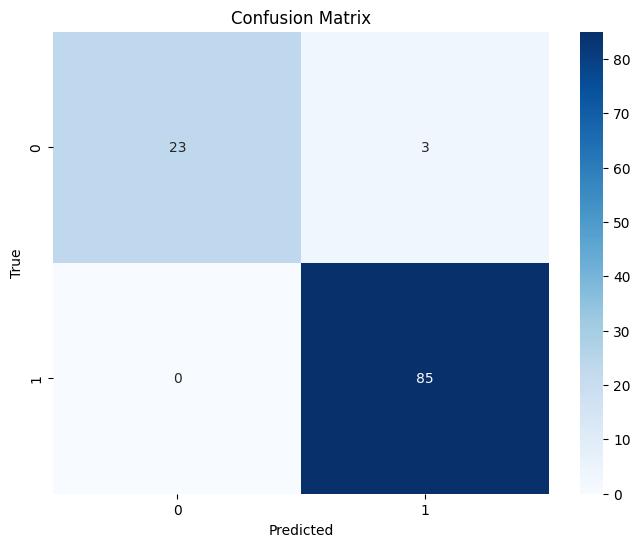

In [6]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA  # Add PCA import
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/dwt-feauture/DWT'
    output_dir = '/kaggle/working/S_U/DWT_ANN_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join('/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_DWT_ANN.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_DWT_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_ANN.txt'))

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/S_U/DWT_ANN_PCA
Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6656 - loss: 116.1662
Epoch 1: val_accuracy improved from -inf to 0.83784, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6667 - loss: 114.7192 - val_accuracy: 0.8378 - val_loss: 29.4778
Epoch 2/300
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 75.5649 
Epoch 2: val_accuracy improved from 0.83784 to 0.87387, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6727 - loss: 74.2173 - val_accuracy: 0.8739 - val_loss: 25.7635
Epoch 3/300
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7526 - loss: 43.0182 
Epoch 3: val_accuracy improved from 0.87387 to 0.88288, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7504 - loss: 43.3735 - val_accuracy: 0.8829 - val_loss: 17.6121
Epoch 4/300
26

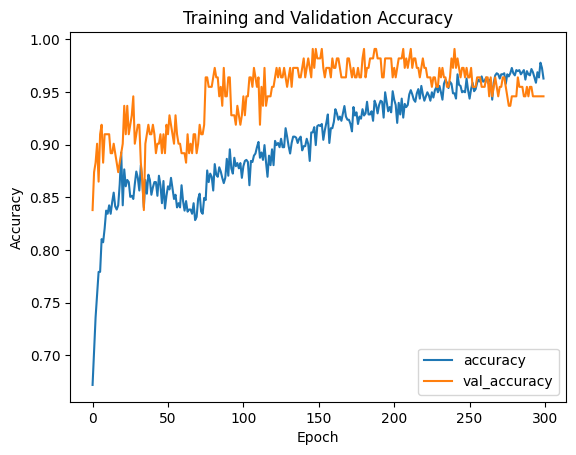

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model accuracy score on test data: 0.9910
Best model saved at: /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
Confusion Matrix plot saved at: /kaggle/working/S_U/DWT_ANN_PCA/confusion_matrix_DWT_ANN.png
Classification Report saved at: /kaggle/working/S_U/DWT_ANN_PCA/classification_report_DWT_ANN.txt


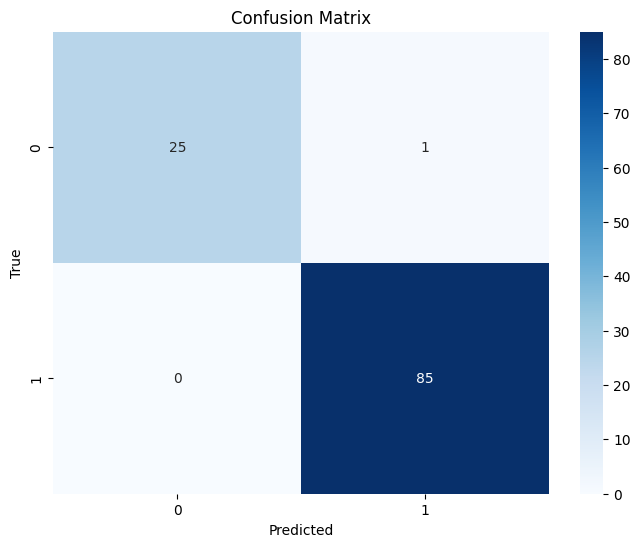

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA  # Add PCA import
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/dwt-feauture/DWT'
    output_dir = '/kaggle/working/S_U/DWT_ANN_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join('/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.94)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_DWT_ANN.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_DWT_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_ANN.txt'))

if __name__ == '__main__':
    main()


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    zip_features_path = '/kaggle/input/zip-feature/features_zip_s_u.csv'

    output_dir = '/kaggle/working/svm_resNet_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target','index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_zip


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 921, in check_array
    _assert_all_finite(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


المجلد موجود بالفعل: /kaggle/working/svm_resNet_zip
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.94      0.98      0.96        85

    accuracy                           0.94       111
   macro avg       0.93      0.89      0.91       111
weighted avg       0.94      0.94      0.94       111

Best trained model saved at: /kaggle/working/svm_resNet_zip/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_zip/test_predictions_best.csv


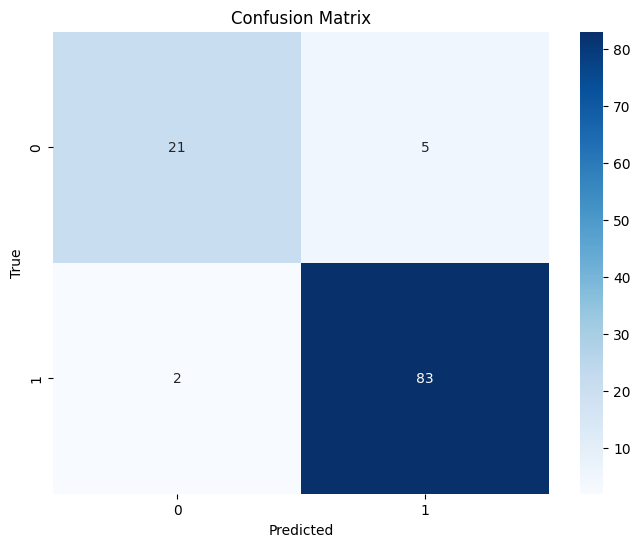

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/svm_resNet_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()

    

المجلد موجود بالفعل: /kaggle/working/svm_resNet_zip
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.65      0.69        26
           1       0.90      0.93      0.91        85

    accuracy                           0.86       111
   macro avg       0.82      0.79      0.80       111
weighted avg       0.86      0.86      0.86       111

Best trained model saved at: /kaggle/working/svm_resNet_zip/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_zip/test_predictions_best.csv


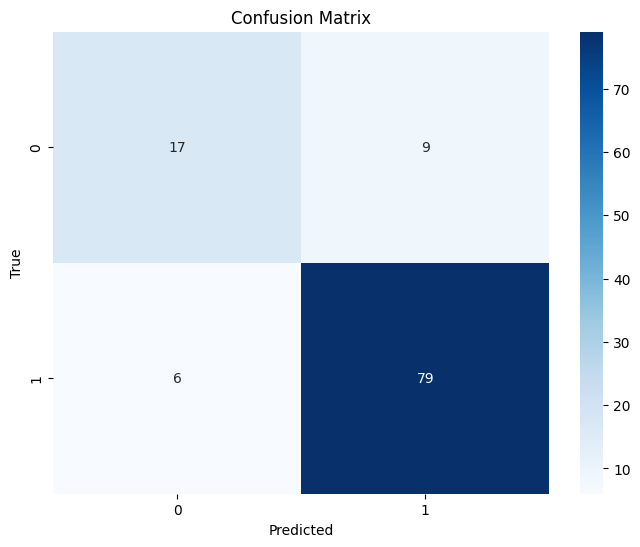

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/svm_resNet_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()

    

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
import numpy as np  # إضافة استيراد numpy

def main():
    # Read data
    data_dir = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/svm_resNet_zip_2'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Compute class weights for imbalance handling
    class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights = dict(zip(np.unique(y), class_weights))

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'class_weight': [None, class_weights]
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


تم إنشاء المجلد بنجاح: /kaggle/working/svm_resNet_zip_2


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.utils.class_weight import compute_class_weight
import numpy as np  # إضافة استيراد numpy
import io  # لإخراج التقرير إلى ملف نصي

def main():
    # Read data
    data_dir = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/svm_resNet_zip_2'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Compute class weights for imbalance handling
    class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
    class_weights = dict(zip(np.unique(y), class_weights))

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'class_weight': [None, class_weights]
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    report = classification_report(y_test, y_pred)
    print('Classification Report:')
    print(report)

    # حفظ تقرير التصنيف في ملف نصي
    report_file_path = os.path.join(output_dir, 'classification_report.txt')
    with open(report_file_path, 'w') as f:
        f.write(report)
    print(f'Classification report saved at: {report_file_path}')

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_zip_2
Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}


المجلد موجود بالفعل: /kaggle/working/svm_resNet_zip
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.91      0.93      0.92        85

    accuracy                           0.87       111
   macro avg       0.83      0.81      0.82       111
weighted avg       0.87      0.87      0.87       111

Best trained model saved at: /kaggle/working/svm_resNet_zip/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_zip/test_predictions_best.csv


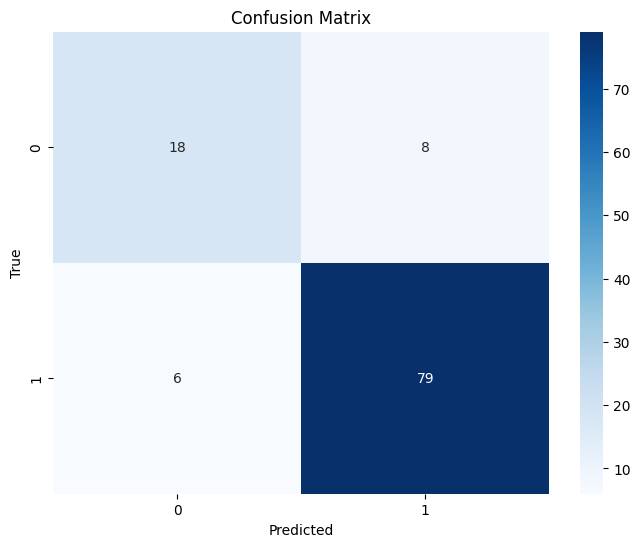

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.decomposition import PCA  # إضافة PCA

def main():
    # Read data
    data_dir = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/svm_resNet_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=0.95)  # الاحتفاظ بـ 95% من التباين
    X = pca.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


تم إنشاء المجلد بنجاح: /kaggle/working/svm_dwt_zip
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.93      0.93      0.93        85

    accuracy                           0.89       111
   macro avg       0.85      0.85      0.85       111
weighted avg       0.89      0.89      0.89       111

Best trained model saved at: /kaggle/working/svm_dwt_zip/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_dwt_zip/test_predictions_best.csv


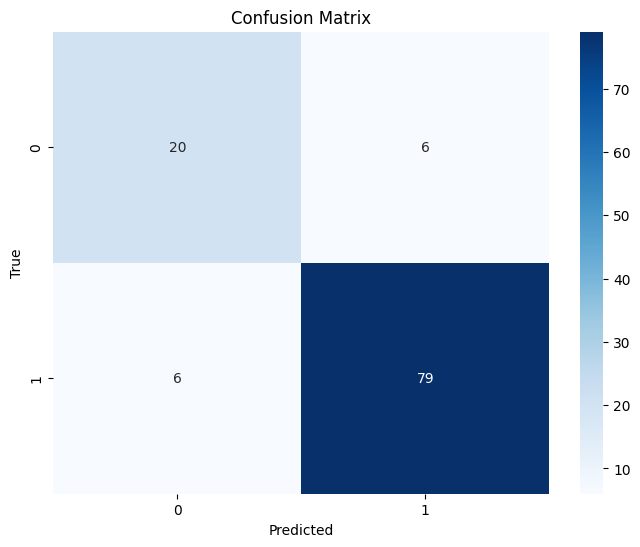

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feautur_DWT_s_u.csv'
    zip_features_path = '/kaggle/input/zip-feature/features_zip_s_u.csv'

    output_dir = '/kaggle/working/svm_dwt_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()

    

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feautur_DWT_s_u.csv'
    zip_features_path = '/kaggle/input/zip-feature/features_zip_s_u.csv'
    gabor_features_path = '/kaggle/input/feature-s-u/feature_s_u/features_gabor.csv'

    output_dir = '/kaggle/working/svm_dwt_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    gabor_df = pd.read_csv(gabor_features_path)
    overlapping_columns = gabor_df.columns.intersection(zip_df.columns)

    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), overlapping_columns.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=21)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()

    

المجلد موجود بالفعل: /kaggle/working/svm_dwt_zip


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

المجلد موجود بالفعل: /kaggle/working/S_U/DWT_ANN_PCA
Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 179.4075
Epoch 1: val_accuracy improved from -inf to 0.75676, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5145 - loss: 154.7966 - val_accuracy: 0.7568 - val_loss: 51.5335
Epoch 2/300
20/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6643 - loss: 70.0298 
Epoch 2: val_accuracy improved from 0.75676 to 0.83784, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6795 - loss: 65.0845 - val_accuracy: 0.8378 - val_loss: 24.8821
Epoch 3/300
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7680 - loss: 37.1337 
Epoch 3: val_accuracy improved from 0.83784 to 0.84685, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7654 - loss: 37.6905 - val_accuracy: 0.8468 - val_loss: 18.5296
Epoch 4/300
22

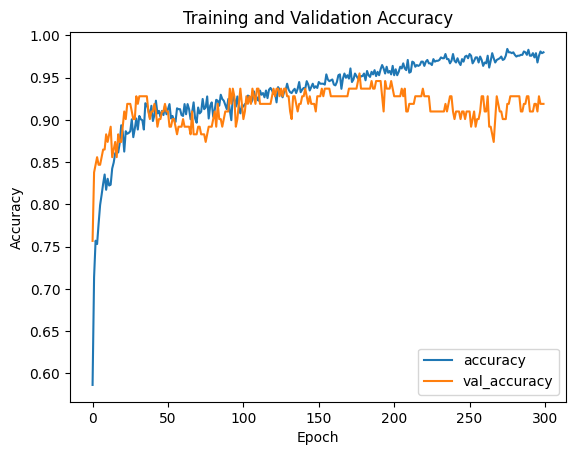

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model accuracy score on test data: 0.9550
Best model saved at: /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
Confusion Matrix plot saved at: /kaggle/working/S_U/DWT_ANN_PCA/confusion_matrix_DWT_ANN.png
Classification Report saved at: /kaggle/working/S_U/DWT_ANN_PCA/classification_report_DWT_ANN.txt


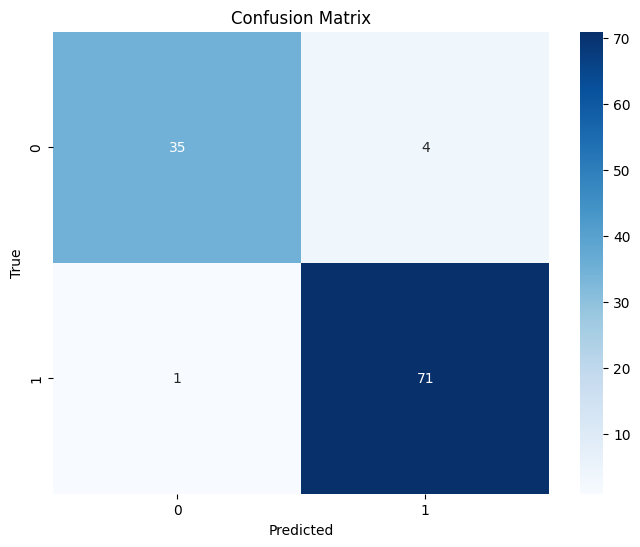

In [6]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA  # Add PCA import
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/dwt-feauture/DWT'
    output_dir = '/kaggle/working/S_U/DWT_ANN_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join('/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=69)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_DWT_ANN.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_DWT_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_ANN.txt'))

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_zip
Best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.94      0.96      0.95        85

    accuracy                           0.93       111
   macro avg       0.91      0.89      0.90       111
weighted avg       0.93      0.93      0.93       111

Best trained model saved at: /kaggle/working/svm_resNet_zip/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_zip/test_predictions_best.csv


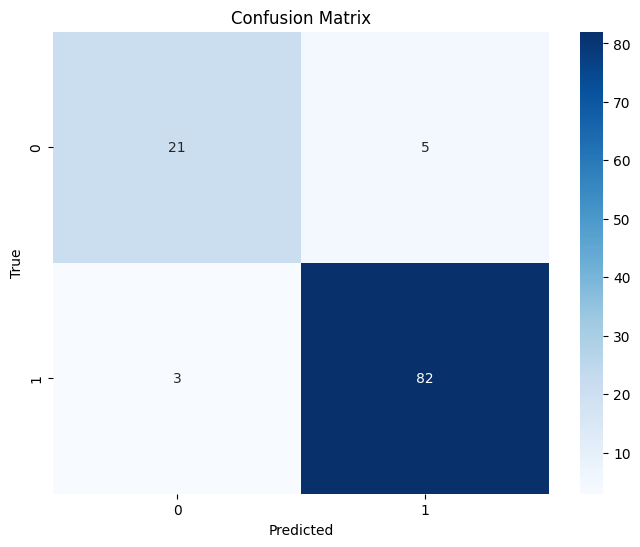

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    zip_features_path = '/kaggle/input/zip-feature/features_zip_s_u.csv'

    output_dir = '/kaggle/working/svm_resNet_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target','index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')  # أو يمكنك استخدام استراتيجية أخرى مثل 'median' أو 'most_frequent'
    X = imputer.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.94      0.96      0.95        85

    accuracy                           0.93       111
   macro avg       0.91      0.89      0.90       111
weighted avg       0.93      0.93      0.93       111

Best trained model saved at: /kaggle/working/svm_resNet/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet/test_predictions_best.csv


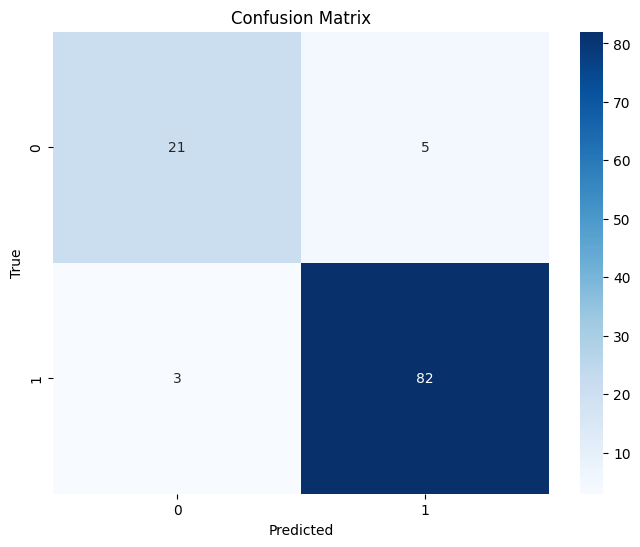

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import pandas as pd
from sklearn import svm, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.impute import SimpleImputer

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u'
    output_dir = '/kaggle/working/svm_resNet'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    df = pd.read_csv(os.path.join('/kaggle/input/xception/xception/feature_xception_S_U.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image','target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA  # Add PCA import
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()

def main():
    # Hardcoded input and output paths
    data_dir = '/kaggle/input/dwt-feauture/DWT'
    output_dir = '/kaggle/working/S_U/DWT_ANN_PCA'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")

    # Read data
    df = pd.read_csv(os.path.join('/kaggle/input/xception/xception/feature_xception_S_U.csv'))
    dt = pd.read_csv(os.path.join('/kaggle/input/target/target2.csv'))

    # Declare feature vector and target variable
    X = df.drop(columns=['image', 'target'])
    y = dt['target']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_DWT_ANN.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_DWT_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_ANN.txt'))

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/S_U/DWT_ANN_PCA


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
16/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3596 - loss: 5.7928 
Epoch 1: val_accuracy improved from -inf to 0.82883, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.4100 - loss: 4.6274 - val_accuracy: 0.8288 - val_loss: 0.5964
Epoch 2/300
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7109 - loss: 0.9162 
Epoch 2: val_accuracy improved from 0.82883 to 0.88288, saving model to /kaggle/working/S_U/DWT_ANN_PCA/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7276 - loss: 0.8976 - val_accuracy: 0.8829 - val_loss: 0.3461
Epoch 3/300
17/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8231 - loss: 0.4831 
Epoch 3: val_accuracy did not improve from 0.88288
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8170 - loss: 0.5118 - val_accuracy: 0.8739 - val_loss: 0.3208
Epoch 4/300
17/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7858 - loss: 0.5941 
Epoc

المجلد موجود بالفعل: /kaggle/working/svm_dwt_zip
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.91      0.92      0.91        85

    accuracy                           0.86       111
   macro avg       0.81      0.80      0.81       111
weighted avg       0.86      0.86      0.86       111

Best trained model saved at: /kaggle/working/svm_dwt_zip/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_dwt_zip/test_predictions_best.csv


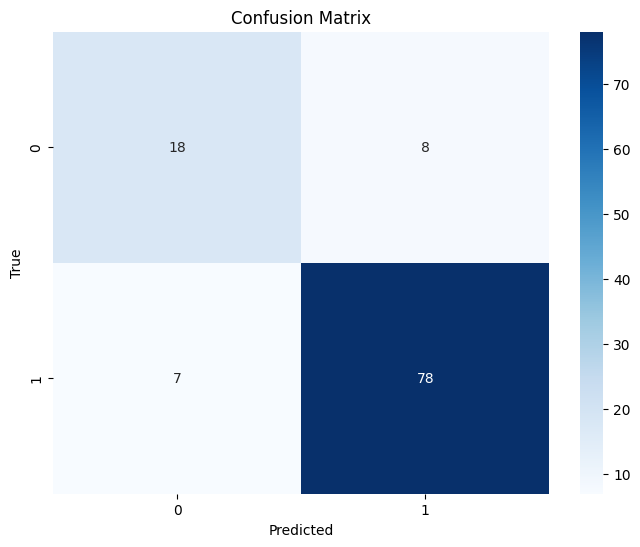

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/xception/xception/feature_xception_S_U.csv'
    zip_features_path = '/kaggle/input/zip-feature/features_zip_s_u.csv'

    output_dir = '/kaggle/working/svm_dwt_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()

    

المجلد موجود بالفعل: /kaggle/working/svm_dwt_zip
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.93      0.93      0.93        85

    accuracy                           0.89       111
   macro avg       0.85      0.85      0.85       111
weighted avg       0.89      0.89      0.89       111

Best trained model saved at: /kaggle/working/svm_dwt_zip/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_dwt_zip/test_predictions_best.csv


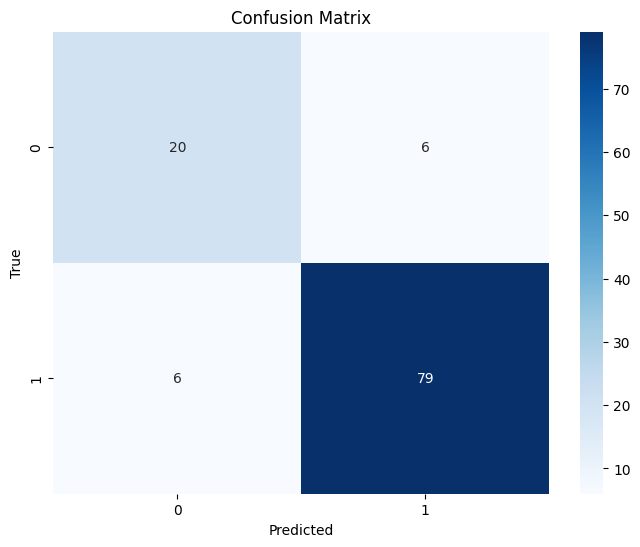

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/xception/xception/feature_xception_S_U.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/svm_dwt_zip'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()

    

المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 778
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.94      0.98      0.96        85

    accuracy                           0.94       111
   macro avg       0.93      0.89      0.91       111
weighted avg       0.94      0.94      0.94       111

Best trained model saved at: /kaggle/working/svm_resNet_gabor_1/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


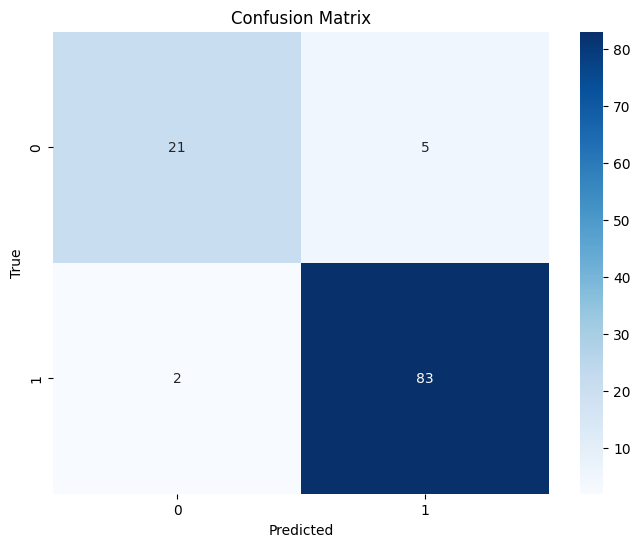

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # استيراد PCA
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.98)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/ANN_resNet_gabor_1
Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - loss: 3.9492
Epoch 1: val_accuracy improved from -inf to 0.84685, saving model to /kaggle/working/ANN_resNet_gabor_1/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6735 - loss: 3.5474 - val_accuracy: 0.8468 - val_loss: 0.6850
Epoch 2/300
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8082 - loss: 1.0672 
Epoch 2: val_accuracy improved from 0.84685 to 0.89189, saving model to /kaggle/working/ANN_resNet_gabor_1/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8028 - loss: 1.0725 - val_accuracy: 0.8919 - val_loss: 0.4957
Epoch 3/300
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.6981 
Epoch 3: val_accuracy improved from 0.89189 to 0.90090, saving model to /kaggle/working/ANN_resNet_gabor_1/best_model_DWT_ANN.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8528 - loss: 0.6914 - val_accuracy: 0.9009 - val_loss: 0.7386
Epoch 4/300
25/3

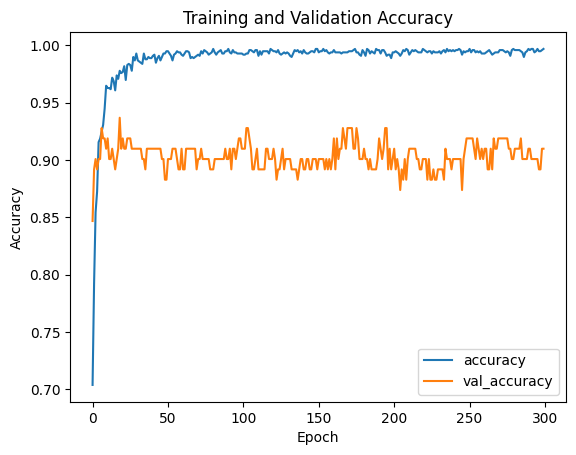

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model accuracy score on test data: 0.9369
Best model saved at: /kaggle/working/ANN_resNet_gabor_1/best_model_DWT_ANN.keras
Confusion Matrix plot saved at: /kaggle/working/ANN_resNet_gabor_1/confusion_matrix_DWT_ANN.png
Classification Report saved at: /kaggle/working/ANN_resNet_gabor_1/classification_report_DWT_ANN.txt


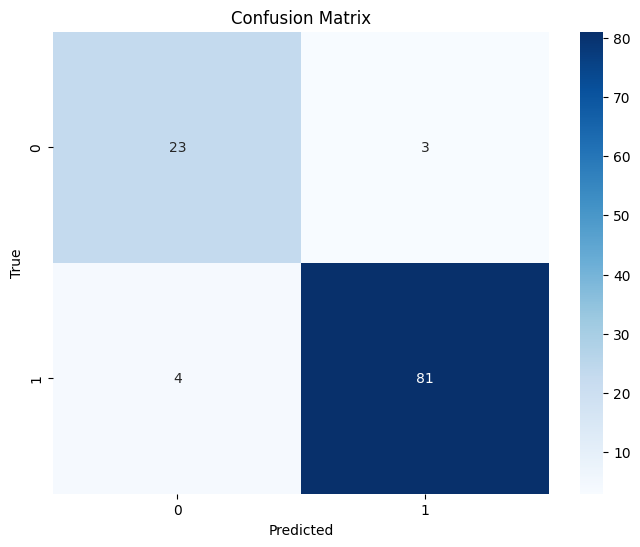

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA  # Add PCA import
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

def plot_training_curve(history, save_path):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(save_path)
    plt.show()

def main():
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    zip_features_path = '/kaggle/input/features-gabor/features_gabor.csv'

    output_dir = '/kaggle/working/ANN_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    zip_df = pd.read_csv(zip_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), zip_df.drop(columns=['image', 'target', 'index'])], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values (fix NaN issue)
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.97)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the callback to save the best model
    checkpoint_filepath = os.path.join(output_dir, 'best_model_DWT_ANN.keras')
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )

    # Train the model with the callback
    history = model.fit(
        X_train_pca, y_train,
        epochs=300, batch_size=32,
        verbose=1,
        validation_data=(X_test_pca, y_test),
        callbacks=[model_checkpoint_callback]
    )

    # Plot training curve
    plot_training_curve(history, os.path.join(output_dir, 'training_curve_DWT_ANN.png'))

    # Evaluate the best model on test data
    best_model = tf.keras.models.load_model(checkpoint_filepath)
    y_pred = (best_model.predict(X_test_pca) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    print('Model accuracy score on test data: {0:0.4f}'.format(accuracy))

    # Save the best model
    print('Best model saved at:', checkpoint_filepath)

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))
    print('Confusion Matrix plot saved at:', os.path.join(output_dir, 'confusion_matrix_DWT_ANN.png'))

    # Generate and save classification report
    class_report = classification_report(y_test, y_pred)
    with open(os.path.join(output_dir, 'classification_report_DWT_ANN.txt'), 'w') as f:
        f.write(class_report)
    print('Classification Report saved at:', os.path.join(output_dir, 'classification_report_DWT_ANN.txt'))

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 697
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.95      0.95      0.95        85

    accuracy                           0.93       111
   macro avg       0.90      0.90      0.90       111
weighted avg       0.93      0.93      0.93       111

Best trained model saved at: /kaggle/working/svm_resNet_gabor_1/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


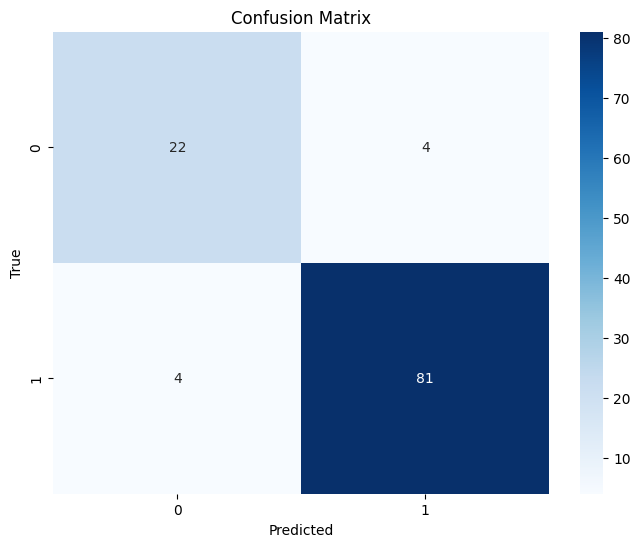

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # استيراد PCA
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'

    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), gabor_df.drop(columns=['image', 'target', 'index']), DWT_df.drop(columns=['image', 'target']),], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 697
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.94      0.96      0.95        85

    accuracy                           0.93       111
   macro avg       0.91      0.89      0.90       111
weighted avg       0.93      0.93      0.93       111

Best trained model saved at: /kaggle/working/svm_resNet_gabor_1/svm_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


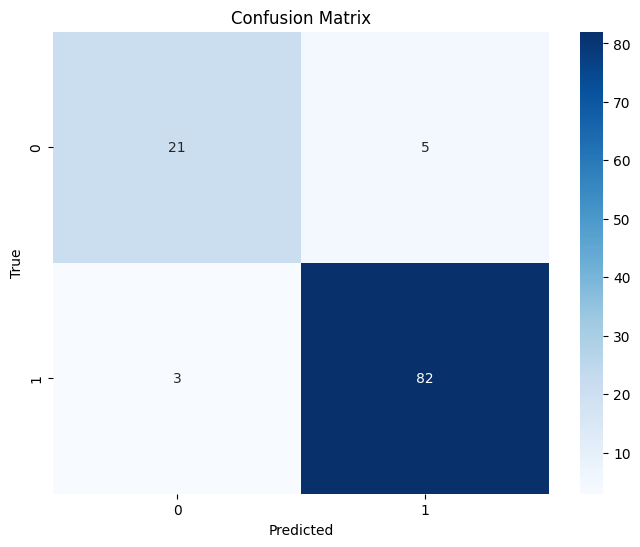

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # استيراد PCA
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn import svm

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'

    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']), gabor_df.drop(columns=['image', 'target', 'index']), DWT_df.drop(columns=['image', 'target']),], axis=1)
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Define hyperparameters grid for grid search
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    }


    # Perform grid search
    clf = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)

    # Get best estimator
    best_svc = clf.best_estimator_

    # Get best parameters
    best_params = clf.best_params_
    print("Best parameters:", best_params)

    # Predict using the best estimator
    y_pred = best_svc.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained model
    model_output_path = os.path.join(output_dir, 'svm_model_best.joblib')
    dump(best_svc, model_output_path)
    print('Best trained model saved at:', model_output_path)
          
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 585
Best parameters for SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.94      0.99      0.97        85

    accuracy                           0.95       111
   macro avg       0.95      0.90      0.92       111
weighted avg       0.95      0.95      0.94       111

Best trained ensemble model saved at: /kaggle/working/svm_resNet_gabor_1/ensemble_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


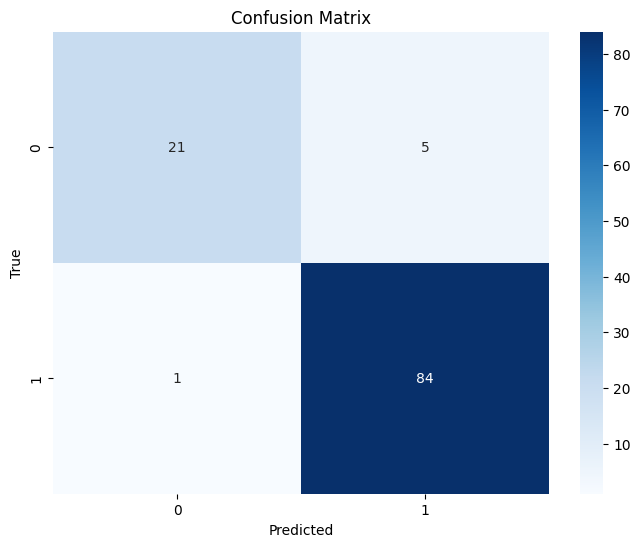

In [7]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from joblib import dump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    
    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']),
                                   gabor_df.drop(columns=['image', 'target', 'index']),
                                   DWT_df.drop(columns=['image', 'target'])], axis=1)
    
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features using MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Apply SMOTE to balance the data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define hyperparameters grid for SVM
    param_grid_svm = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    }

    # Perform grid search for SVM
    clf_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=5, scoring='accuracy')
    clf_svm.fit(X_train_resampled, y_train_resampled)

    # Get best SVM estimator
    best_svc = clf_svm.best_estimator_
    print("Best parameters for SVM:", clf_svm.best_params_)

    # Define hyperparameters grid for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Perform grid search for Random Forest
    clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
    clf_rf.fit(X_train_resampled, y_train_resampled)

    # Get best Random Forest estimator
    best_rf = clf_rf.best_estimator_
    print("Best parameters for Random Forest:", clf_rf.best_params_)

    # Ensemble using VotingClassifier
    clf_ensemble = VotingClassifier(estimators=[('svm', best_svc), ('rf', best_rf)], voting='hard')
    clf_ensemble.fit(X_train_resampled, y_train_resampled)

    # Predict using the ensemble model
    y_pred = clf_ensemble.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained ensemble model
    model_output_path = os.path.join(output_dir, 'ensemble_model_best.joblib')
    dump(clf_ensemble, model_output_path)
    print('Best trained ensemble model saved at:', model_output_path)
    
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 635
Best parameters for SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        26
           1       0.94      0.99      0.97        85

    accuracy                           0.95       111
   macro avg       0.95      0.90      0.92       111
weighted avg       0.95      0.95      0.94       111

Best trained ensemble model saved at: /kaggle/working/svm_resNet_gabor_1/ensemble_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


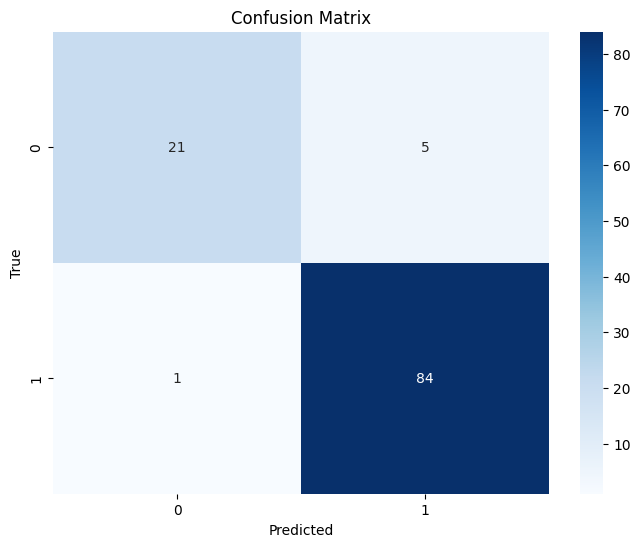

In [8]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from joblib import dump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    
    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']),
                                   gabor_df.drop(columns=['image', 'target', 'index']),
                                   DWT_df.drop(columns=['image', 'target'])], axis=1)
    
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features using MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.96)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Apply SMOTE to balance the data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define hyperparameters grid for SVM
    param_grid_svm = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    }

    # Perform grid search for SVM
    clf_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=5, scoring='accuracy')
    clf_svm.fit(X_train_resampled, y_train_resampled)

    # Get best SVM estimator
    best_svc = clf_svm.best_estimator_
    print("Best parameters for SVM:", clf_svm.best_params_)

    # Define hyperparameters grid for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Perform grid search for Random Forest
    clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
    clf_rf.fit(X_train_resampled, y_train_resampled)

    # Get best Random Forest estimator
    best_rf = clf_rf.best_estimator_
    print("Best parameters for Random Forest:", clf_rf.best_params_)

    # Ensemble using VotingClassifier
    clf_ensemble = VotingClassifier(estimators=[('svm', best_svc), ('rf', best_rf)], voting='hard')
    clf_ensemble.fit(X_train_resampled, y_train_resampled)

    # Predict using the ensemble model
    y_pred = clf_ensemble.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained ensemble model
    model_output_path = os.path.join(output_dir, 'ensemble_model_best.joblib')
    dump(clf_ensemble, model_output_path)
    print('Best trained ensemble model saved at:', model_output_path)
    
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 635
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        24
           1       0.99      0.92      0.95        87

    accuracy                           0.93       111
   macro avg       0.88      0.94      0.90       111
weighted avg       0.94      0.93      0.93       111

Best trained ensemble model saved at: /kaggle/working/svm_resNet_gabor_1/ensemble_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


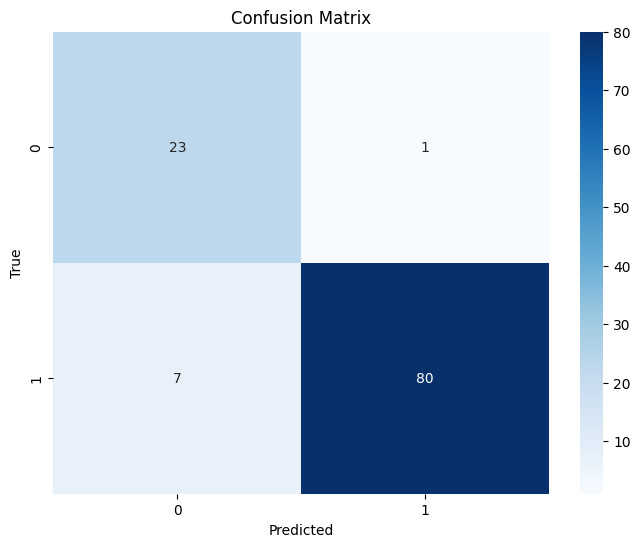

In [9]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from joblib import dump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    
    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']),
                                   gabor_df.drop(columns=['image', 'target', 'index']),
                                   DWT_df.drop(columns=['image', 'target'])], axis=1)
    
    dt = pd.read_csv(os.path.join('/kaggle/input/feature-s-u/feature_s_u/target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features using MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.96)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Apply SMOTE to balance the data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define hyperparameters grid for SVM
    param_grid_svm = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    }

    # Perform grid search for SVM
    clf_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=5, scoring='accuracy')
    clf_svm.fit(X_train_resampled, y_train_resampled)

    # Get best SVM estimator
    best_svc = clf_svm.best_estimator_
    print("Best parameters for SVM:", clf_svm.best_params_)

    # Define hyperparameters grid for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Perform grid search for Random Forest
    clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
    clf_rf.fit(X_train_resampled, y_train_resampled)

    # Get best Random Forest estimator
    best_rf = clf_rf.best_estimator_
    print("Best parameters for Random Forest:", clf_rf.best_params_)

    # Ensemble using VotingClassifier
    clf_ensemble = VotingClassifier(estimators=[('svm', best_svc), ('rf', best_rf)], voting='hard')
    clf_ensemble.fit(X_train_resampled, y_train_resampled)

    # Predict using the ensemble model
    y_pred = clf_ensemble.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained ensemble model
    model_output_path = os.path.join(output_dir, 'ensemble_model_best.joblib')
    dump(clf_ensemble, model_output_path)
    print('Best trained ensemble model saved at:', model_output_path)
    
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 635
Best parameters for SVM: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'poly'}
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       347
           1       1.00      0.99      0.99       760

    accuracy                           0.99      1107
   macro avg       0.99      0.99      0.99      1107
weighted avg       0.99      0.99      0.99      1107

Best trained stacking model saved at: /kaggle/working/svm_resNet_gabor_1/stacking_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


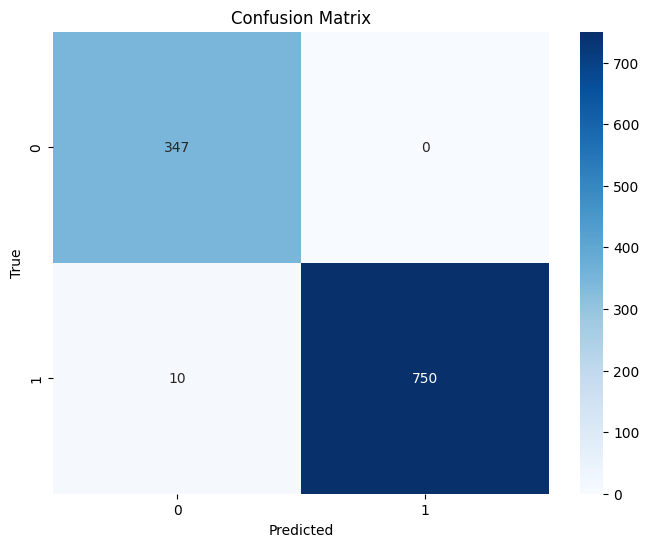

In [1]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from joblib import dump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    
    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']),
                                   gabor_df.drop(columns=['image', 'target', 'index']),
                                   DWT_df.drop(columns=['image', 'target'])], axis=1)
    
    dt = pd.read_csv(os.path.join('/kaggle/input/target', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features using MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.96)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Apply SMOTE to balance the data
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Define StratifiedKFold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define hyperparameters grid for SVM with class_weight
    param_grid_svm = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'class_weight': [None, 'balanced']
    }

    # Perform grid search for SVM
    clf_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=skf, scoring='accuracy')
    clf_svm.fit(X_resampled, y_resampled)

    # Get best SVM estimator
    best_svc = clf_svm.best_estimator_
    print("Best parameters for SVM:", clf_svm.best_params_)

    # Define hyperparameters grid for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Perform grid search for Random Forest
    clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=skf, scoring='accuracy')
    clf_rf.fit(X_resampled, y_resampled)

    # Get best Random Forest estimator
    best_rf = clf_rf.best_estimator_
    print("Best parameters for Random Forest:", clf_rf.best_params_)

    # Train a Gradient Boosting Classifier
    clf_gb = GradientBoostingClassifier(random_state=42)
    clf_gb.fit(X_resampled, y_resampled)

    # Stacking with Logistic Regression as meta-model
    clf_stack = StackingClassifier(estimators=[('svm', best_svc), ('rf', best_rf), ('gb', clf_gb)], final_estimator=LogisticRegression())
    clf_stack.fit(X_resampled, y_resampled)

    # Predict using the stacking model
    y_pred = clf_stack.predict(X)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y, y_pred))

    # Save the trained ensemble model
    model_output_path = os.path.join(output_dir, 'stacking_model_best.joblib')
    dump(clf_stack, model_output_path)
    print('Best trained stacking model saved at:', model_output_path)
    
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 635
Best parameters for SVM: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.98      0.98      0.98        92

    accuracy                           0.96       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.96      0.96      0.96       111

Best trained ensemble model saved at: /kaggle/working/svm_resNet_gabor_1/ensemble_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


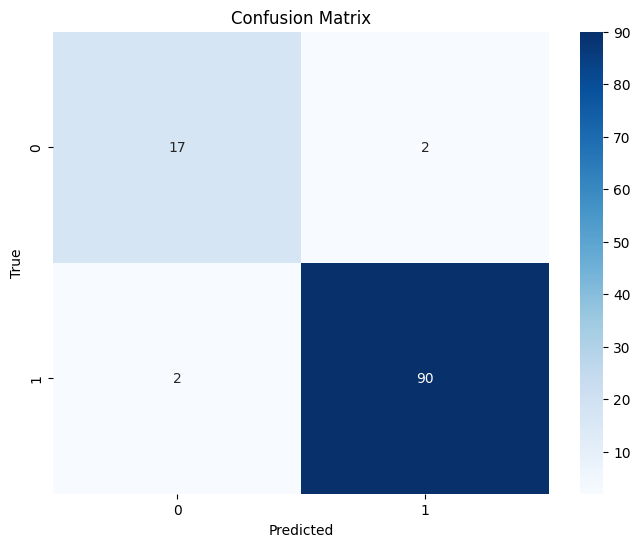

In [1]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from joblib import dump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    
    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']),
                                   gabor_df.drop(columns=['image', 'target', 'index']),
                                   DWT_df.drop(columns=['image', 'target'])], axis=1)
    
    dt = pd.read_csv(os.path.join('/kaggle/input/target22', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target2']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features using MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.96)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Apply SMOTE to balance the data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define hyperparameters grid for SVM
    param_grid_svm = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    }

    # Perform grid search for SVM
    clf_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=5, scoring='accuracy')
    clf_svm.fit(X_train_resampled, y_train_resampled)

    # Get best SVM estimator
    best_svc = clf_svm.best_estimator_
    print("Best parameters for SVM:", clf_svm.best_params_)

    # Define hyperparameters grid for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Perform grid search for Random Forest
    clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
    clf_rf.fit(X_train_resampled, y_train_resampled)

    # Get best Random Forest estimator
    best_rf = clf_rf.best_estimator_
    print("Best parameters for Random Forest:", clf_rf.best_params_)

    # Ensemble using VotingClassifier
    clf_ensemble = VotingClassifier(estimators=[('svm', best_svc), ('rf', best_rf)], voting='hard')
    clf_ensemble.fit(X_train_resampled, y_train_resampled)

    # Predict using the ensemble model
    y_pred = clf_ensemble.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained ensemble model
    model_output_path = os.path.join(output_dir, 'ensemble_model_best.joblib')
    dump(clf_ensemble, model_output_path)
    print('Best trained ensemble model saved at:', model_output_path)
    
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()


المجلد موجود بالفعل: /kaggle/working/svm_resNet_gabor_1
عدد المكونات بعد تطبيق PCA: 585
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.99      0.98      0.98        92

    accuracy                           0.97       111
   macro avg       0.94      0.96      0.95       111
weighted avg       0.97      0.97      0.97       111

Best trained ensemble model saved at: /kaggle/working/svm_resNet_gabor_1/ensemble_model_best.joblib
Test predictions saved at: /kaggle/working/svm_resNet_gabor_1/test_predictions_best.csv


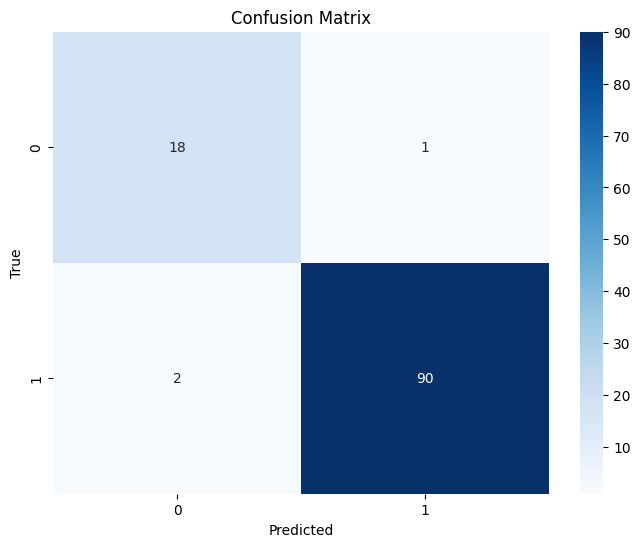

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from joblib import dump
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE

def main():
    # Read data
    data_dir = '/kaggle/input/feature-s-u/feature_s_u/feature_Res_net.csv'
    gabor_features_path = '/kaggle/input/features-gabor/features_gabor.csv'
    DWT_features_path = '/kaggle/input/data-s-u-f/feature_s_u/feautur_DWT_s_u.csv'
    
    output_dir = '/kaggle/working/svm_resNet_gabor_1'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"تم إنشاء المجلد بنجاح: {output_dir}")
    else:
        print(f"المجلد موجود بالفعل: {output_dir}")
    
    resnet_df = pd.read_csv(data_dir)
    gabor_df = pd.read_csv(gabor_features_path)
    DWT_df = pd.read_csv(DWT_features_path)
    combined_features = pd.concat([resnet_df.drop(columns=['image', 'target']),
                                   gabor_df.drop(columns=['image', 'target', 'index']),
                                   DWT_df.drop(columns=['image', 'target'])], axis=1)
    
    dt = pd.read_csv(os.path.join('/kaggle/input/target22', 'target2.csv'))

    # Declare feature vector and target variable
    X = combined_features
    y = dt['target2']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Standardize the features using MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=0.95)  # الحفاظ على 95% من التباين
    X = pca.fit_transform(X)
    print(f"عدد المكونات بعد تطبيق PCA: {pca.n_components_}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

    # Apply SMOTE to balance the data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define hyperparameters grid for SVM
    param_grid_svm = {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
    }

    # Perform grid search for SVM
    clf_svm = GridSearchCV(svm.SVC(), param_grid_svm, cv=5, scoring='accuracy')
    clf_svm.fit(X_train_resampled, y_train_resampled)

    # Get best SVM estimator
    best_svc = clf_svm.best_estimator_
    print("Best parameters for SVM:", clf_svm.best_params_)

    # Define hyperparameters grid for Random Forest
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    # Perform grid search for Random Forest
    clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
    clf_rf.fit(X_train_resampled, y_train_resampled)

    # Get best Random Forest estimator
    best_rf = clf_rf.best_estimator_
    print("Best parameters for Random Forest:", clf_rf.best_params_)

    # Ensemble using VotingClassifier
    clf_ensemble = VotingClassifier(estimators=[('svm', best_svc), ('rf', best_rf)], voting='hard')
    clf_ensemble.fit(X_train_resampled, y_train_resampled)

    # Predict using the ensemble model
    y_pred = clf_ensemble.predict(X_test)

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save the trained ensemble model
    model_output_path = os.path.join(output_dir, 'ensemble_model_best.joblib')
    dump(clf_ensemble, model_output_path)
    print('Best trained ensemble model saved at:', model_output_path)
    
    # Save test predictions to a CSV file
    test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    test_results.to_csv(os.path.join(output_dir, 'test_predictions_best.csv'), index=False)
    print('Test predictions saved at:', os.path.join(output_dir, 'test_predictions_best.csv'))

    # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == '__main__':
    main()
